# **Grid Search Results**

In [1]:
import os
os.chdir("../src")

In [2]:
import utils
import models

2022-07-21 15:11:26.577381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-21 15:11:26.577408: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


[2022-07-21 15:11:27,462][__init__.py - line 36] - INFO - You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
/home/leon/causal-relationships/.env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[2022-07-21 15:11:27,789][__init__.py - line 31] - INFO - You are using ``pytorch`` as the backend.
No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [3]:
import matplotlib.pyplot as plt

In [4]:
path_to_results = "../out/grid-search/"
results = utils.get_files(path_to_results)
{model: results[model] for model in sorted(results)}

{'boosting.json': '../out/grid-search/boosting.json',
 'castle.json': '../out/grid-search/castle.json',
 'causal-selection_ges-boosting.json': '../out/grid-search/causal-selection_ges-boosting.json',
 'causal-selection_ges-decision-tree.json': '../out/grid-search/causal-selection_ges-decision-tree.json',
 'causal-selection_ges-logistic-regression.json': '../out/grid-search/causal-selection_ges-logistic-regression.json',
 'causal-selection_lingam-boosting.json': '../out/grid-search/causal-selection_lingam-boosting.json',
 'causal-selection_lingam-decision-tree.json': '../out/grid-search/causal-selection_lingam-decision-tree.json',
 'causal-selection_lingam-logistic-regression.json': '../out/grid-search/causal-selection_lingam-logistic-regression.json',
 'causal-selection_notears-boosting.json': '../out/grid-search/causal-selection_notears-boosting.json',
 'causal-selection_notears-decision-tree.json': '../out/grid-search/causal-selection_notears-decision-tree.json',
 'causal-selection_n

## Benchmark Models

### Logistic Regression

In [5]:
lr = utils.GridSearch(models.sklearn.LogisticRegression, results["logistic-regression.json"])

finished loading results from ../out/grid-search/logistic-regression.json.


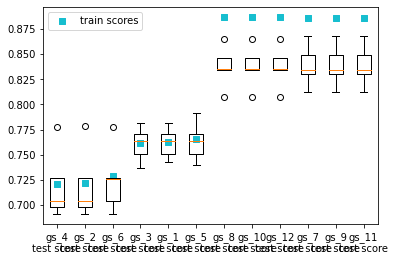

In [6]:
lr.plot()

In [7]:
lr.set_best("gs_1")
lr.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': None},
 'undersampling': {},
 'init': {'penalty': 'l2', 'C': 1, 'class_weight': None, 'n_jobs': -1},
 'fit': {},
 'predict': {}}

In [8]:
lr.dump()

stored dictionary to ../out/grid-search/logistic-regression.json.


#### Feature Selection: Correlation

In [9]:
selection_model = "correlation"
predictive_model = "logistic-regression"
lr_corr = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_correlation-logistic-regression.json.


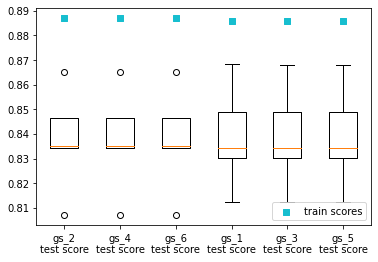

In [10]:
lr_corr.plot()

In [11]:
lr_corr.set_best("gs_6")
lr_corr.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'correlation',
  'predictive_model': 'LogisticRegression',
  'predictive_init': {'penalty': 'l2',
   'C': 0.5,
   'class_weight': 'balanced',
   'n_jobs': -1}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [12]:
lr_corr.dump()

stored dictionary to ../out/grid-search/feature-selection_correlation-logistic-regression.json.


#### Feature Selection: OLS

In [13]:
selection_model = "ols"
predictive_model = "logistic-regression"
lr_ols = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_ols-logistic-regression.json.


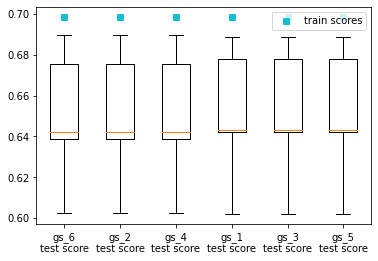

In [14]:
lr_ols.plot()

In [15]:
lr_ols.set_best("gs_5")
lr_ols.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'ols',
  'predictive_model': 'LogisticRegression',
  'predictive_init': {'penalty': 'l2',
   'C': 0.5,
   'class_weight': None,
   'n_jobs': -1}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [16]:
lr_ols.dump()

stored dictionary to ../out/grid-search/feature-selection_ols-logistic-regression.json.


#### Feature Selection: RFE

In [17]:
selection_model = "rfe"
predictive_model = "logistic-regression"
lr_rfe = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_rfe-logistic-regression.json.


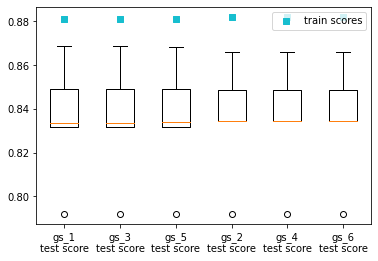

In [18]:
lr_rfe.plot()

In [19]:
lr_rfe.set_best("gs_6")
lr_rfe.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'rfe',
  'predictive_model': 'LogisticRegression',
  'predictive_init': {'penalty': 'l2',
   'C': 0.5,
   'class_weight': 'balanced',
   'n_jobs': -1}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [20]:
lr_rfe.dump()

stored dictionary to ../out/grid-search/feature-selection_rfe-logistic-regression.json.


#### Feature Selection: SFS

In [21]:
selection_model = "sfs"
predictive_model = "logistic-regression"
lr_sfs = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_sfs-logistic-regression.json.


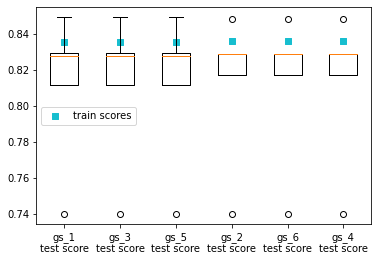

In [22]:
lr_sfs.plot()

In [23]:
lr_sfs.set_best("gs_4")
lr_sfs.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'sfs',
  'predictive_model': 'LogisticRegression',
  'predictive_init': {'penalty': 'l2',
   'C': 0.75,
   'class_weight': 'balanced',
   'n_jobs': -1}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [24]:
lr_sfs.dump()

stored dictionary to ../out/grid-search/feature-selection_sfs-logistic-regression.json.


### Decision Tree

In [25]:
dt = utils.GridSearch(models.sklearn.DecisionTreeClassifier, results["decision-tree.json"])

finished loading results from ../out/grid-search/decision-tree.json.


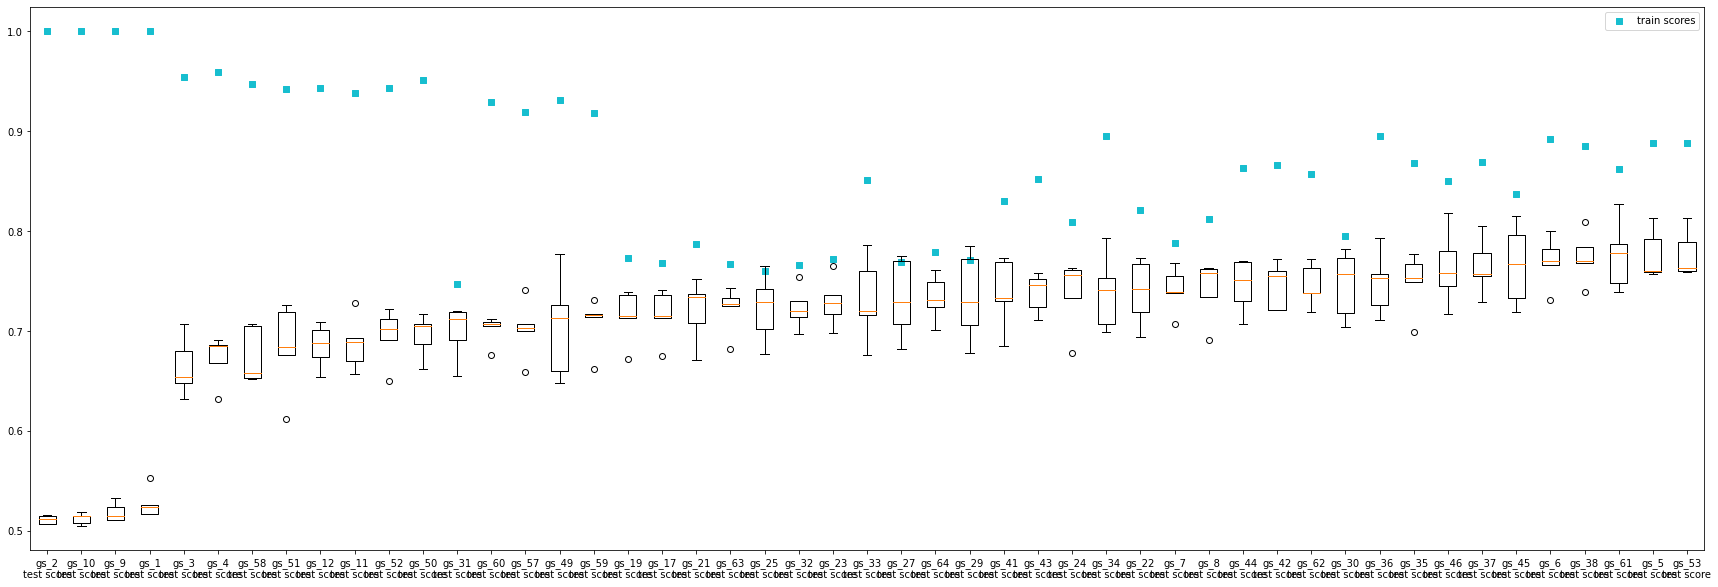

In [26]:
dt.evaluate()
dt.plot(figsize=(30, 10))

In [27]:
dt.set_best("gs_53")
dt.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 0.01,
  'class_weight': None,
  'random_state': 123},
 'fit': {},
 'predict': {}}

In [28]:
dt.dump()

stored dictionary to ../out/grid-search/decision-tree.json.


#### Feature Selection: Correlation

In [29]:
selection_model = "correlation"
predictive_model = "decision-tree"
dt_corr = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_correlation-decision-tree.json.


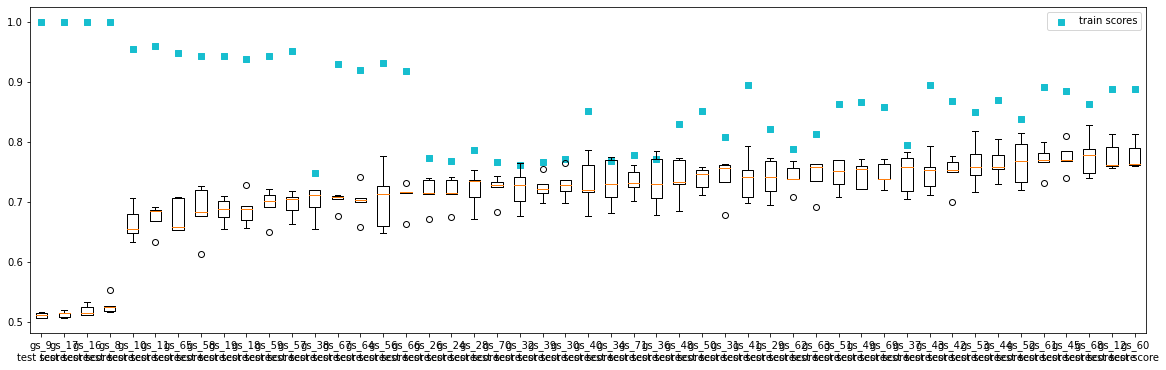

In [30]:
dt_corr.plot(figsize=(20, 6))

In [31]:
dt_corr.set_best("gs_60")
dt_corr.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'correlation',
  'predictive_model': 'DecisionTreeClassifier',
  'predictive_init': {'max_depth': 10,
   'max_features': None,
   'min_samples_leaf': 0.01,
   'class_weight': None,
   'random_state': 123}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [32]:
dt_corr.dump()

stored dictionary to ../out/grid-search/feature-selection_correlation-decision-tree.json.


#### Feature Selection: OLS

In [33]:
selection_model = "ols"
predictive_model = "decision-tree"
dt_ols = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_ols-decision-tree.json.


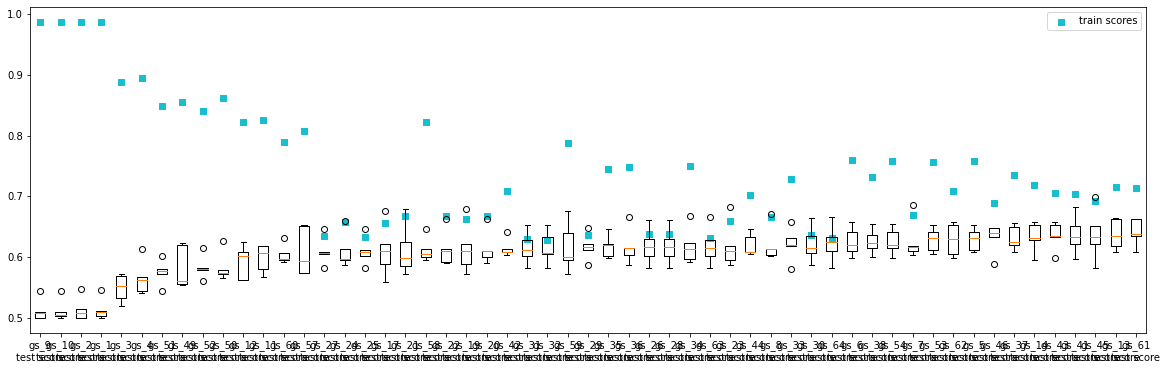

In [34]:
dt_ols.plot(figsize=(20, 6))

In [35]:
dt_ols.set_best("gs_61")
dt_ols.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'ols',
  'predictive_model': 'DecisionTreeClassifier',
  'predictive_init': {'max_depth': 10,
   'max_features': 'sqrt',
   'min_samples_leaf': 0.01,
   'class_weight': None,
   'random_state': 123}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [36]:
dt_ols.dump()

stored dictionary to ../out/grid-search/feature-selection_ols-decision-tree.json.


#### Feature Selection: RFE

In [37]:
selection_model = "rfe"
predictive_model = "decision-tree"
dt_rfe = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_rfe-decision-tree.json.


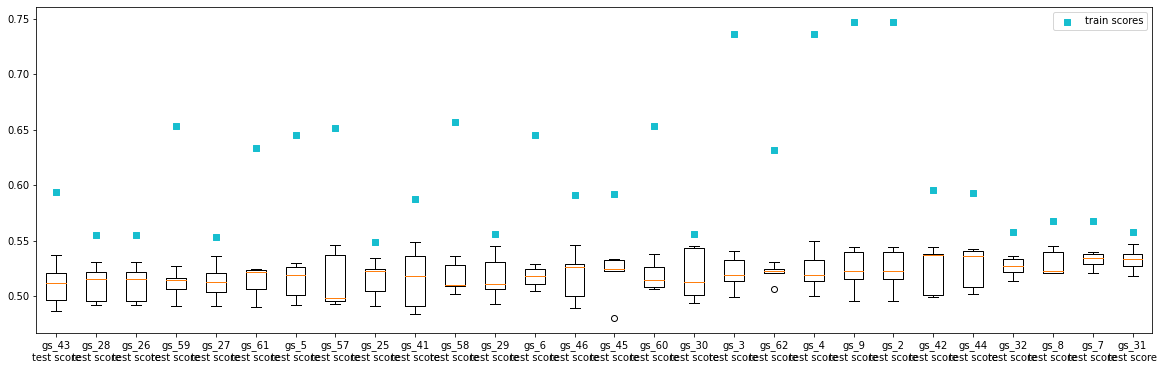

In [38]:
dt_rfe.plot(figsize=(20,6))

In [39]:
dt_rfe.set_best("gs_31")
dt_rfe.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'rfe',
  'predictive_model': 'DecisionTreeClassifier',
  'predictive_init': {'max_depth': 3,
   'max_features': 'sqrt',
   'min_samples_leaf': 0.1,
   'class_weight': None,
   'random_state': 123}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [40]:
dt_rfe.dump()

stored dictionary to ../out/grid-search/feature-selection_rfe-decision-tree.json.


#### Feature Selection: SFS

In [41]:
selection_model = "sfs"
predictive_model = "decision-tree"
dt_sfs = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_sfs-decision-tree.json.


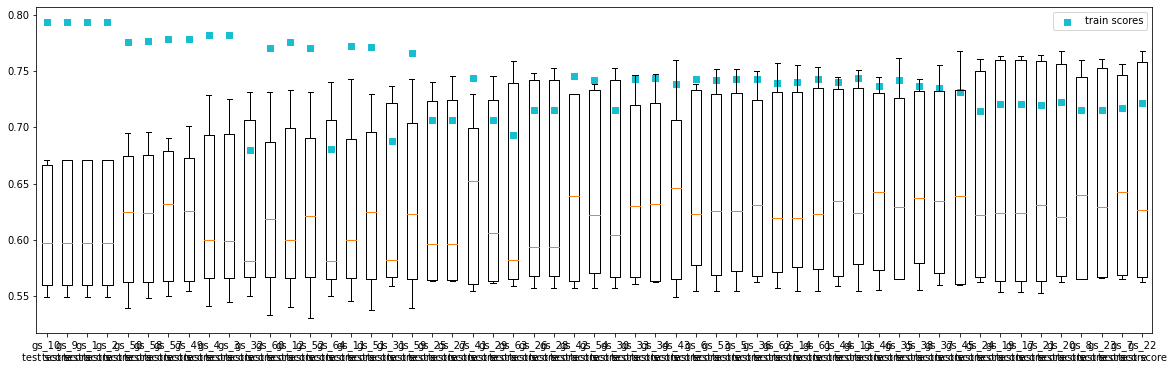

In [42]:
dt_sfs.plot(figsize=(20, 6))

In [43]:
dt_sfs.set_best("gs_22")
dt_sfs.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'sfs',
  'predictive_model': 'DecisionTreeClassifier',
  'predictive_init': {'max_depth': 3,
   'max_features': None,
   'min_samples_leaf': 0.01,
   'class_weight': 'balanced',
   'random_state': 123}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [44]:
dt_sfs.dump()

stored dictionary to ../out/grid-search/feature-selection_sfs-decision-tree.json.


### Gradient Boosting 

In [45]:
gb = utils.GridSearch(models.sklearn.GradientBoostingClassifier, results["boosting.json"])

finished loading results from ../out/grid-search/boosting.json.


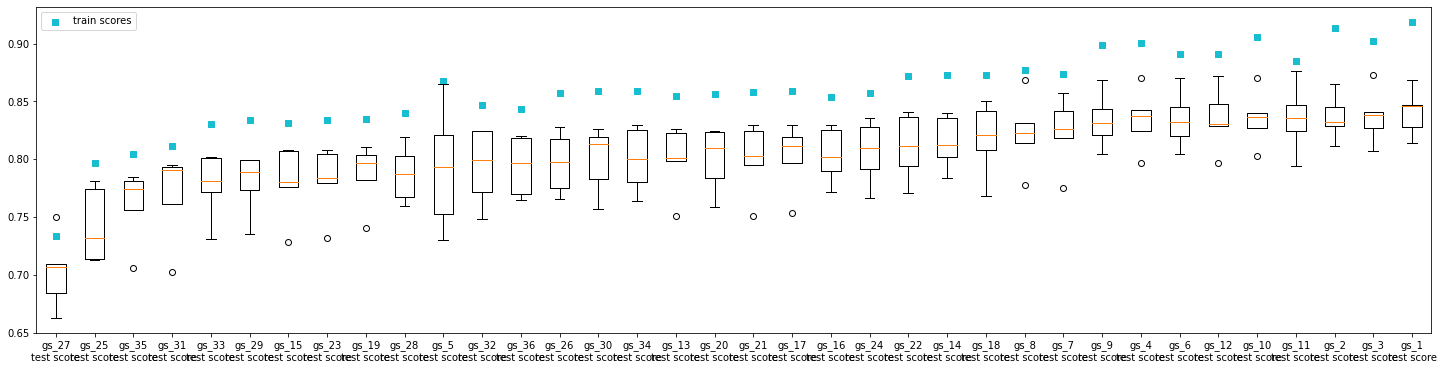

In [46]:
gb.evaluate()
gb.plot(figsize=(25,6))

In [47]:
gb.set_best("gs_1")
gb.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'learning_rate': 0.1,
  'subsample': 1,
  'min_samples_leaf': 1,
  'max_depth': 3,
  'max_features': None},
 'fit': {},
 'predict': {}}

In [48]:
gb.dump()

stored dictionary to ../out/grid-search/boosting.json.


#### Feature Selection: Correlation

In [49]:
selection_model = "correlation"
predictive_model = "boosting"
gb_corr = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_correlation-boosting.json.


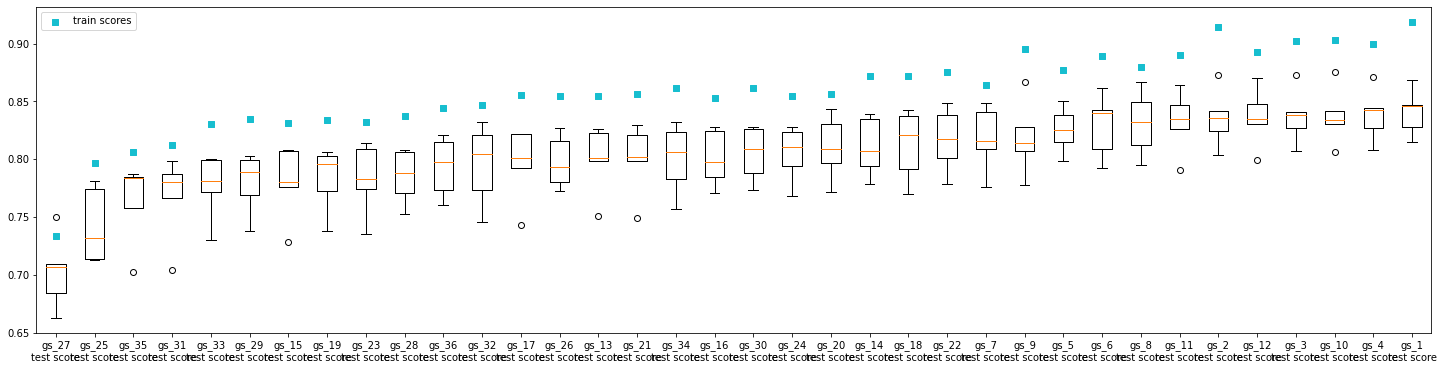

In [50]:
gb_corr.plot(figsize=(25, 6))

In [51]:
gb_corr.set_best("gs_1")
gb_corr.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'correlation',
  'predictive_model': 'GradientBoostingClassifier',
  'predictive_init': {'learning_rate': 0.1,
   'subsample': 1,
   'min_samples_leaf': 1,
   'max_depth': 3,
   'max_features': None}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [52]:
gb_corr.dump()

stored dictionary to ../out/grid-search/feature-selection_correlation-boosting.json.


#### Feature Selection: OLS

In [53]:
selection_model = "ols"
predictive_model = "boosting"
gb_ols = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_ols-boosting.json.


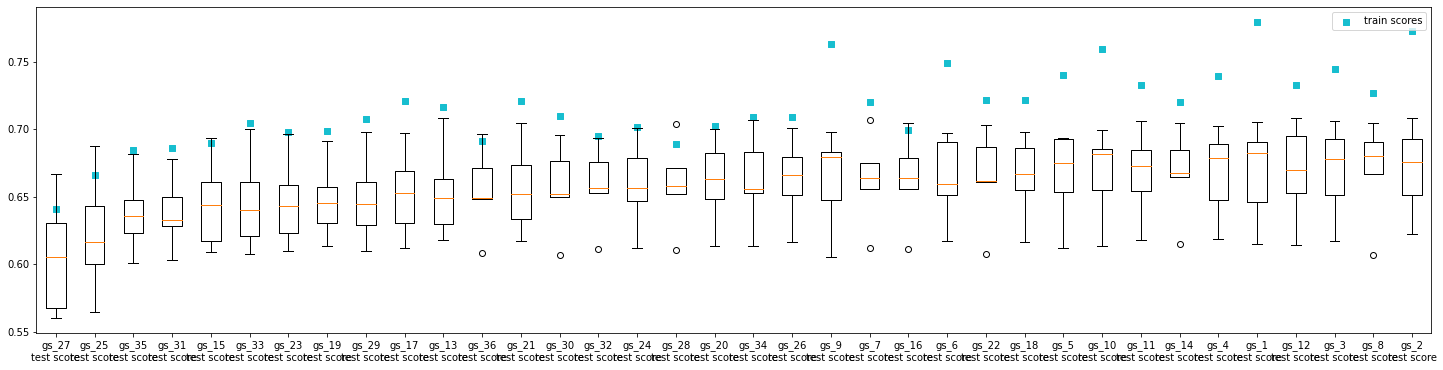

In [54]:
gb_ols.plot(figsize=(25, 6))

In [55]:
gb_ols.set_best("gs_2")
gb_ols.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'ols',
  'predictive_model': 'GradientBoostingClassifier',
  'predictive_init': {'learning_rate': 0.1,
   'subsample': 1,
   'min_samples_leaf': 1,
   'max_depth': 3,
   'max_features': 'sqrt'}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [56]:
gb_ols.dump()

stored dictionary to ../out/grid-search/feature-selection_ols-boosting.json.


#### Feature Selection: RFE

Due to a long training time for the RFE-Gradient Boosting combination, we refrain from performing a grid search for this model and choose the default parameter for training the model.

In [57]:
selection_model = "rfe"
predictive_model = "boosting"
gb_rfe = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_rfe-boosting.json.


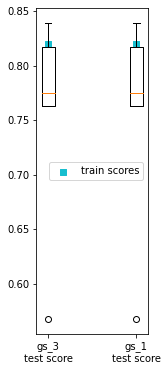

In [58]:
gb_rfe.plot(figsize=(2, 6))

In [59]:
gb_rfe.set_best("gs_3")
gb_rfe.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'rfe',
  'predictive_model': 'GradientBoostingClassifier',
  'selection_init': {'cv': 2},
  'predictive_init': {}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [60]:
gb_rfe.dump()

stored dictionary to ../out/grid-search/feature-selection_rfe-boosting.json.


#### Feature Selection: SFS

Due to a long training time for the SFS-Gradient Boosting combination, we refrain from performing a grid search for this model and choose the default parameter for training the model.

In [61]:
selection_model = "sfs"
predictive_model = "boosting"
gb_sfs = utils.GridSearch(models.FeatureSelection, results[f"feature-selection_{selection_model}-{predictive_model}.json"])

finished loading results from ../out/grid-search/feature-selection_sfs-boosting.json.


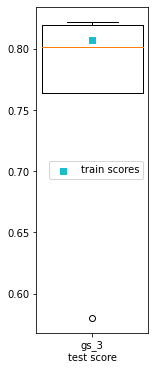

In [62]:
gb_sfs.plot(figsize=(2, 6))

In [63]:
gb_sfs.set_best("gs_3")
gb_sfs.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'selection_model': 'sfs',
  'predictive_model': 'GradientBoostingClassifier',
  'selection_init': {'cv': 2},
  'predictive_init': {}},
 'fit': {'predictive_params': {}},
 'predict': {}}

In [64]:
gb_sfs.dump()

stored dictionary to ../out/grid-search/feature-selection_sfs-boosting.json.


## Performance models

### Causal Selection: PC, GradientBoosting

In [65]:
pc_gb = utils.GridSearch(models.CausalSelection, results["causal-selection_pc-boosting.json"])

finished loading results from ../out/grid-search/causal-selection_pc-boosting.json.


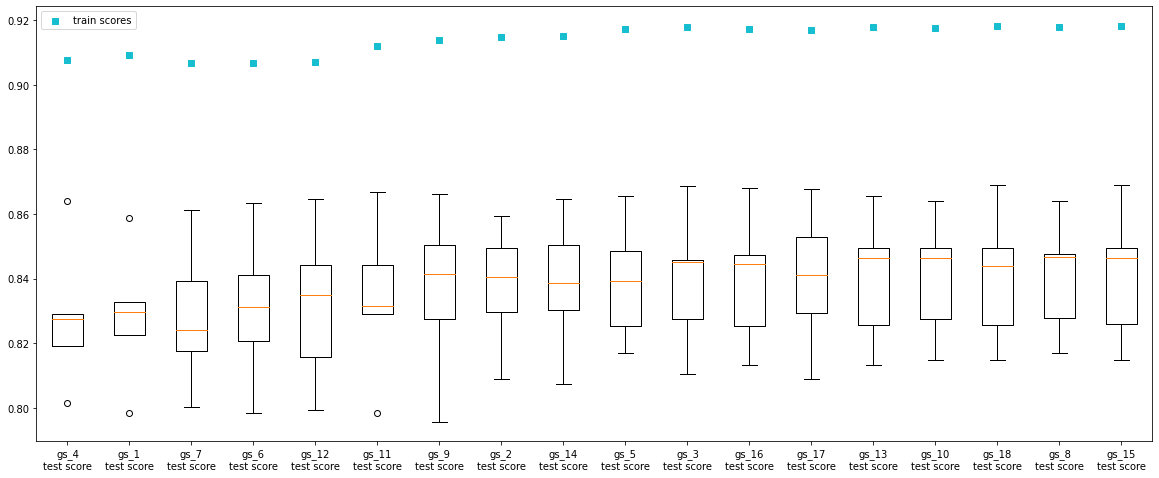

In [66]:
pc_gb.evaluate()
pc_gb.plot(figsize=(20, 8))

In [67]:
pc_gb.set_best("gs_15")
pc_gb.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'PC',
  'predictive_model': 'GradientBoostingClassifier',
  'causal_init': {'alpha': 0.1},
  'predictive_init': {'learning_rate': 0.1,
   'subsample': 1,
   'min_samples_leaf': 1,
   'max_depth': 3,
   'max_features': None}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'causal_undersampling_ratio

In [68]:
pc_gb.dump()

stored dictionary to ../out/grid-search/causal-selection_pc-boosting.json.


### Causal Selection: GES, GradientBoosting

In [69]:
ges_gb = utils.GridSearch(models.CausalSelection, results["causal-selection_ges-boosting.json"])

finished loading results from ../out/grid-search/causal-selection_ges-boosting.json.


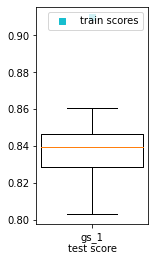

In [70]:
ges_gb.evaluate()
ges_gb.plot(figsize=(2, 4))

In [71]:
ges_gb.set_best("gs_1")
ges_gb.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'GES',
  'predictive_model': 'GradientBoostingClassifier',
  'causal_init': {},
  'predictive_init': {'learning_rate': 0.1,
   'subsample': 1,
   'min_samples_leaf': 1,
   'max_depth': 3,
   'max_features': None}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'predictive_undersampling_ratio': None

In [72]:
ges_gb.dump()

stored dictionary to ../out/grid-search/causal-selection_ges-boosting.json.


### Causal Selection: LiNGAM, GradientBoosting

In [73]:
lingam_gb = utils.GridSearch(models.CausalSelection, results["causal-selection_lingam-boosting.json"])

finished loading results from ../out/grid-search/causal-selection_lingam-boosting.json.


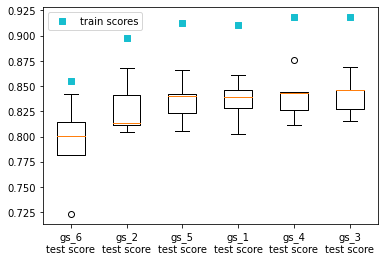

In [74]:
lingam_gb.evaluate()
lingam_gb.plot()

In [75]:
lingam_gb.set_best("gs_3")
lingam_gb.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'ICALiNGAM',
  'predictive_model': 'GradientBoostingClassifier',
  'causal_init': {'thresh': 0.01},
  'predictive_init': {'learning_rate': 0.1,
   'subsample': 1,
   'min_samples_leaf': 1,
   'max_depth': 3,
   'max_features': None}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'predictive_unders

In [76]:
lingam_gb.dump()

stored dictionary to ../out/grid-search/causal-selection_lingam-boosting.json.


### Causal Selection: NOTEARS, GradientBoosting

In [77]:
notears_gb = utils.GridSearch(models.CausalSelection, results["causal-selection_notears-boosting.json"])

finished loading results from ../out/grid-search/causal-selection_notears-boosting.json.


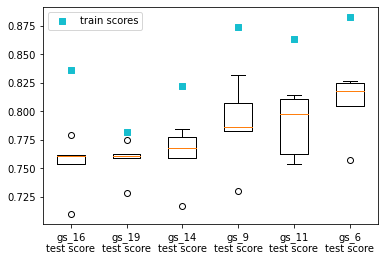

In [78]:
notears_gb.evaluate()
notears_gb.plot()

In [79]:
notears_gb.set_best("gs_6")
notears_gb.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'Notears',
  'predictive_model': 'GradientBoostingClassifier',
  'causal_init': {'w_threshold': 0.01},
  'predictive_init': {'learning_rate': 0.1,
   'subsample': 1,
   'min_samples_leaf': 1,
   'max_depth': 3,
   'max_features': None}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'causal_undersa

In [80]:
notears_gb.dump()

stored dictionary to ../out/grid-search/causal-selection_notears-boosting.json.


### CASTLE

In [81]:
castle = utils.GridSearch(models.CASTLE, results["castle.json"])

finished loading results from ../out/grid-search/castle.json.


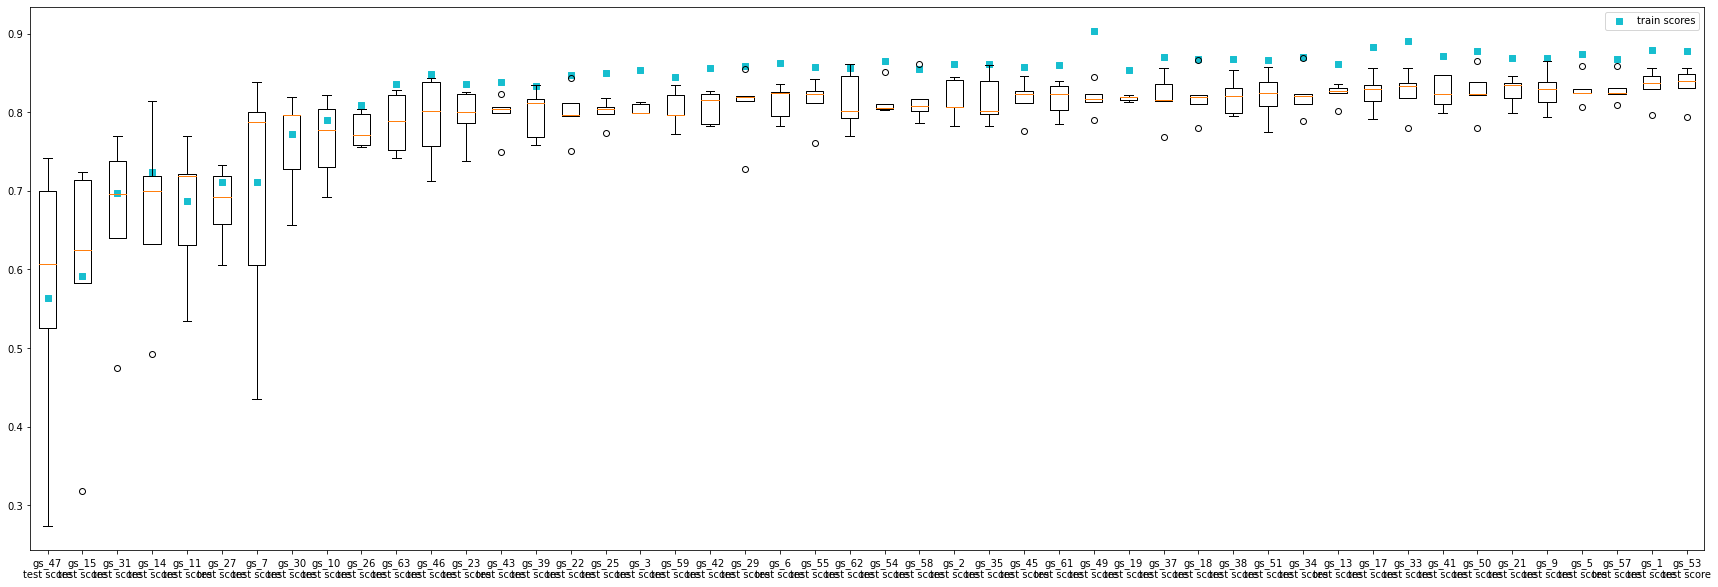

In [82]:
castle.evaluate()
castle.plot(figsize=(30, 10))

In [83]:
castle.set_best("gs_53")
castle.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'reg_lambda': 15,
  'reg_beta': 3,
  'w_threshold': -3,
  'sigmoid_output': [0],
  'ckpt_file': '../cache/tmp.ckpt',
  'loss_function': 'bce'},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'undersampling_ratio': 0.3333333333333333,
  'verbose': 0},
 'predict': {}}

In [84]:
castle.dump()

stored dictionary to ../out/grid-search/castle.json.


## Interpretable models 

### Causal Selection: PC, Logistic Regression

In [85]:
pc_lr = utils.GridSearch(models.CausalSelection, results["causal-selection_pc-logistic-regression.json"])

finished loading results from ../out/grid-search/causal-selection_pc-logistic-regression.json.


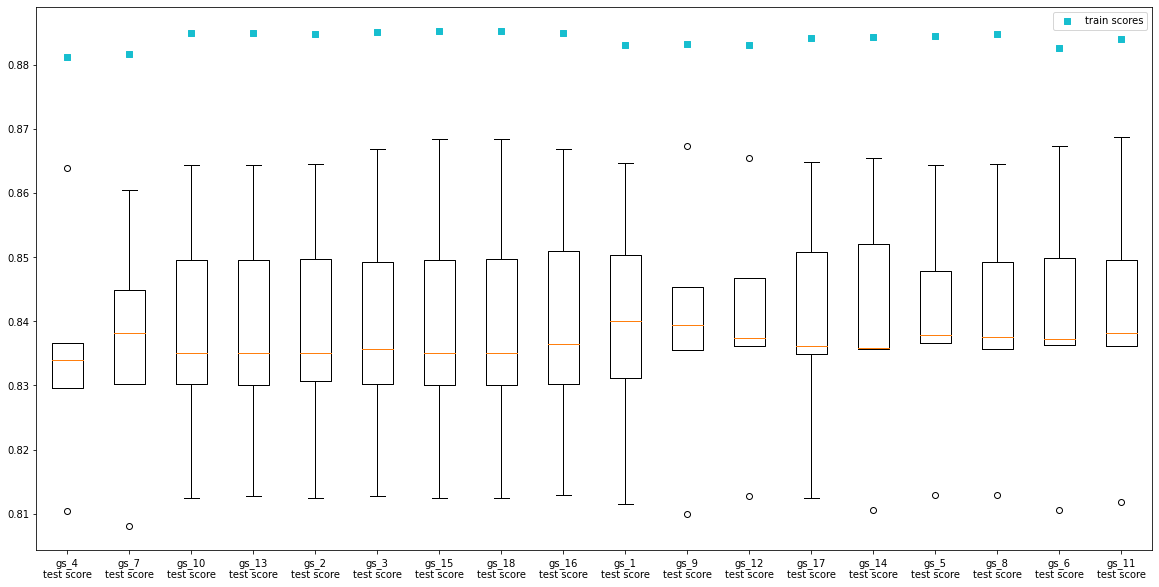

In [86]:
pc_lr.evaluate()
pc_lr.plot(figsize=(20, 10))

In [87]:
pc_lr.set_best("gs_11")
pc_lr.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'PC',
  'predictive_model': 'LogisticRegression',
  'causal_init': {'alpha': 0.01},
  'predictive_init': {'penalty': 'l2',
   'C': 1,
   'class_weight': None,
   'n_jobs': -1}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'causal_undersampling_ratio': 0.1,
  'predictive_undersampling_ratio': None

In [88]:
pc_lr.dump()

stored dictionary to ../out/grid-search/causal-selection_pc-logistic-regression.json.


### Causal Selection: GES, Logistic Regression

In [89]:
ges_lr = utils.GridSearch(models.CausalSelection, results["causal-selection_ges-logistic-regression.json"])

finished loading results from ../out/grid-search/causal-selection_ges-logistic-regression.json.


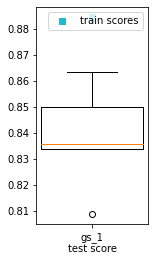

In [90]:
ges_lr.evaluate()
ges_lr.plot(figsize=(2, 4))

In [91]:
ges_lr.set_best("gs_1")
ges_lr.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'GES',
  'predictive_model': 'LogisticRegression',
  'causal_init': {},
  'predictive_init': {'penalty': 'l2',
   'C': 1,
   'class_weight': None,
   'n_jobs': -1}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'predictive_undersampling_ratio': None,
  'predictive_params': {}},
 'predict': {}}

In [92]:
ges_lr.dump()

stored dictionary to ../out/grid-search/causal-selection_ges-logistic-regression.json.


### Causal Selection: LiNGAM, Logistic Regression

In [93]:
lingam_lr = utils.GridSearch(models.CausalSelection, results["causal-selection_lingam-logistic-regression.json"])

finished loading results from ../out/grid-search/causal-selection_lingam-logistic-regression.json.


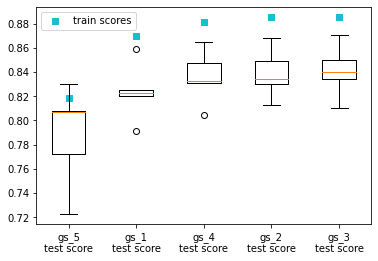

In [94]:
lingam_lr.evaluate()
lingam_lr.plot()

In [95]:
lingam_lr.set_best("gs_3")
lingam_lr.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'ICALiNGAM',
  'predictive_model': 'LogisticRegression',
  'causal_init': {'thresh': 0.1},
  'predictive_init': {'penalty': 'l2',
   'C': 1,
   'class_weight': None,
   'n_jobs': -1}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'predictive_undersampling_ratio': None,
  'predictive_params': {}},


In [96]:
lingam_lr.dump()

stored dictionary to ../out/grid-search/causal-selection_lingam-logistic-regression.json.


### Causal Selection: NOTEARS, Logistic Regression

In [97]:
notears_lr = utils.GridSearch(models.CausalSelection, results["causal-selection_notears-logistic-regression.json"])

finished loading results from ../out/grid-search/causal-selection_notears-logistic-regression.json.


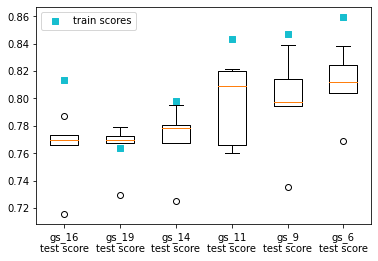

In [98]:
notears_lr.evaluate()
notears_lr.plot()

In [99]:
notears_lr.set_best("gs_6")
notears_lr.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'Notears',
  'predictive_model': 'LogisticRegression',
  'causal_init': {'w_threshold': 0.01},
  'predictive_init': {'penalty': 'l2',
   'C': 1,
   'class_weight': None,
   'n_jobs': -1}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'causal_undersampling_ratio': 0.3,
  'predictive_undersampling_r

In [100]:
notears_lr.dump()

stored dictionary to ../out/grid-search/causal-selection_notears-logistic-regression.json.


### Causal Selection: PC, Decision Tree

In [101]:
pc_dt = utils.GridSearch(models.CausalSelection, results["causal-selection_pc-decision-tree.json"])

finished loading results from ../out/grid-search/causal-selection_pc-decision-tree.json.


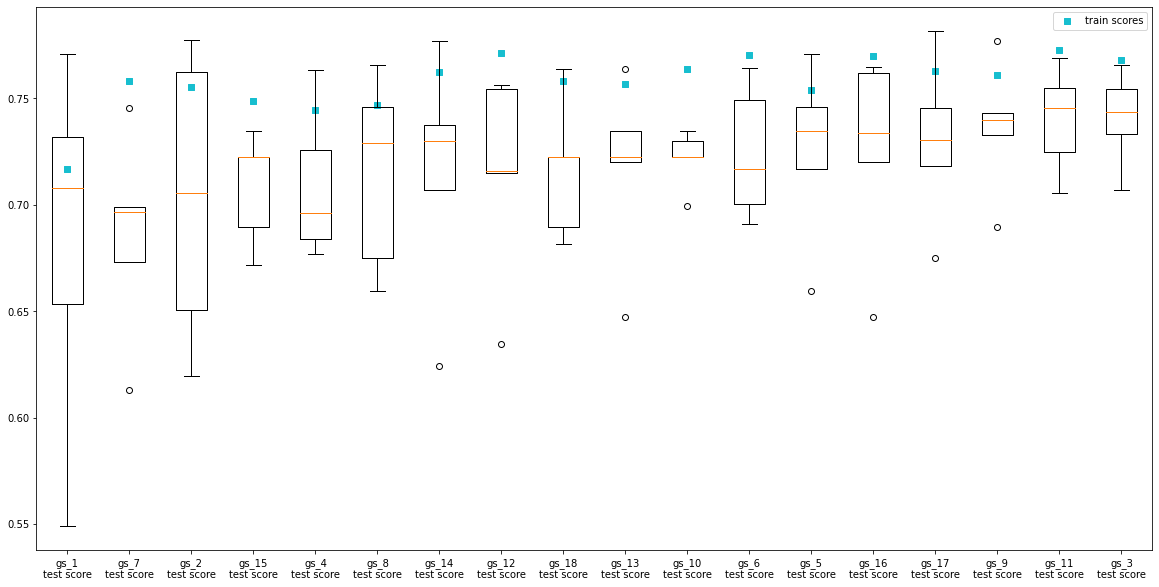

In [102]:
pc_dt.evaluate()
pc_dt.plot(figsize=(20,10))

In [103]:
pc_dt.set_best("gs_3")
pc_dt.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'PC',
  'predictive_model': 'DecisionTreeClassifier',
  'causal_init': {'alpha': 0.1},
  'predictive_init': {'max_depth': 3,
   'max_features': 'sqrt',
   'min_samples_leaf': 0.1,
   'class_weight': 'balanced',
   'random_state': 123}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'causal_undersam

In [104]:
pc_dt.dump()

stored dictionary to ../out/grid-search/causal-selection_pc-decision-tree.json.


### Causal Selection: GES, Decision Tree

In [105]:
ges_dt = utils.GridSearch(models.CausalSelection, results["causal-selection_ges-decision-tree.json"])

finished loading results from ../out/grid-search/causal-selection_ges-decision-tree.json.


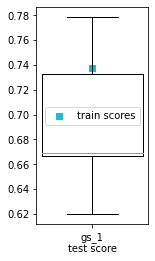

In [106]:
ges_dt.evaluate()
ges_dt.plot(figsize=(2, 4))

In [107]:
ges_dt.set_best("gs_1")
ges_dt.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'GES',
  'predictive_model': 'DecisionTreeClassifier',
  'causal_init': {},
  'predictive_init': {'max_depth': 3,
   'max_features': 'sqrt',
   'min_samples_leaf': 0.1,
   'class_weight': 'balanced',
   'random_state': 123}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'predictive_undersampling_r

In [108]:
ges_dt.dump()

stored dictionary to ../out/grid-search/causal-selection_ges-decision-tree.json.


### Causal Selection: LiNGAM, Decision Tree

In [109]:
lingam_dt = utils.GridSearch(models.CausalSelection, results["causal-selection_lingam-decision-tree.json"])

finished loading results from ../out/grid-search/causal-selection_lingam-decision-tree.json.


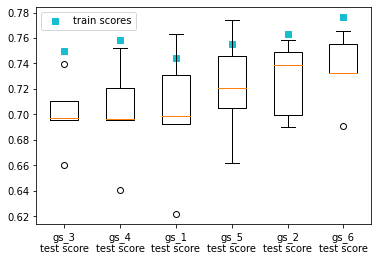

In [110]:
lingam_dt.evaluate()
lingam_dt.plot()

In [111]:
lingam_dt.set_best("gs_6")
lingam_dt.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'ICALiNGAM',
  'predictive_model': 'DecisionTreeClassifier',
  'causal_init': {'thresh': 0.5},
  'predictive_init': {'max_depth': 3,
   'max_features': 'sqrt',
   'min_samples_leaf': 0.1,
   'class_weight': 'balanced',
   'random_state': 123}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'predict

In [112]:
lingam_dt.dump()

stored dictionary to ../out/grid-search/causal-selection_lingam-decision-tree.json.


### Causal Selection: NOTEARS, Decision Tree

In [113]:
notears_dt = utils.GridSearch(models.CausalSelection, results["causal-selection_notears-decision-tree.json"])

finished loading results from ../out/grid-search/causal-selection_notears-decision-tree.json.


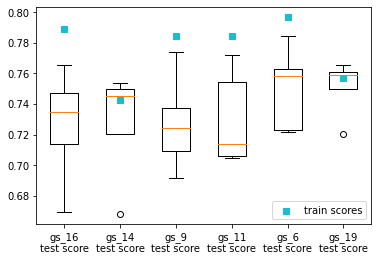

In [114]:
notears_dt.evaluate()
notears_dt.plot()

In [115]:
notears_dt.set_best("gs_6")
notears_dt.params["best"]

{'train_test_split': {'to_woe': ['zipcode',
   'cd_msa',
   'st',
   'seller_name',
   'servicer_name',
   'prop_val_meth',
   'prop_type',
   'flag_fthb',
   'pgrm_ind',
   'occpy_sts',
   'loan_purpose',
   'channel',
   'prod_type'],
  'scaler': 'StandardScaler'},
 'undersampling': {},
 'init': {'causal_model': 'Notears',
  'predictive_model': 'DecisionTreeClassifier',
  'causal_init': {'w_threshold': 0.01},
  'predictive_init': {'max_depth': 3,
   'max_features': 'sqrt',
   'min_samples_leaf': 0.1,
   'class_weight': 'balanced',
   'random_state': 123}},
 'fit': {'X_labels': ['fico',
   'flag_fthb',
   'cd_msa',
   'mi_pct',
   'cnt_units',
   'occpy_sts',
   'cltv',
   'dti',
   'orig_upb',
   'ltv',
   'int_rt',
   'channel',
   'ppmt_pnlty',
   'prod_type',
   'st',
   'prop_type',
   'zipcode',
   'loan_purpose',
   'orig_loan_term',
   'cnt_borr',
   'seller_name',
   'servicer_name',
   'flag_sc',
   'pgrm_ind',
   'rel_ref_ind',
   'prop_val_meth',
   'int_only_ind'],
  'cau

In [116]:
notears_dt.dump()

stored dictionary to ../out/grid-search/causal-selection_notears-decision-tree.json.


## Comparision

In [117]:
test_scores = {}
train_scores = {}
names = [
    "boosting", 
    "decision-tree",
    "logistic-regression",
    "causal-selection_pc-boosting", 
    "causal-selection_pc-decision-tree",
    "causal-selection_pc-logistic-regression",
    "causal-selection_ges-boosting", 
    "causal-selection_ges-decision-tree",
    "causal-selection_ges-logistic-regression",
    "causal-selection_lingam-boosting", 
    "causal-selection_lingam-decision-tree",
    "causal-selection_lingam-logistic-regression",
    "causal-selection_notears-boosting", 
    "causal-selection_notears-decision-tree",
    "causal-selection_notears-logistic-regression",
    "castle"
]
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/decision-tree.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_pc-boosting.json.
finished loading results from ../out/grid-search/causal-selection_pc-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_pc-logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_ges-boosting.json.
finished loading results from ../out/grid-search/causal-selection_ges-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_ges-logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_lingam-boosting.json.
finished loading results from ../out/grid-search/causal-selection_lingam-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_lingam

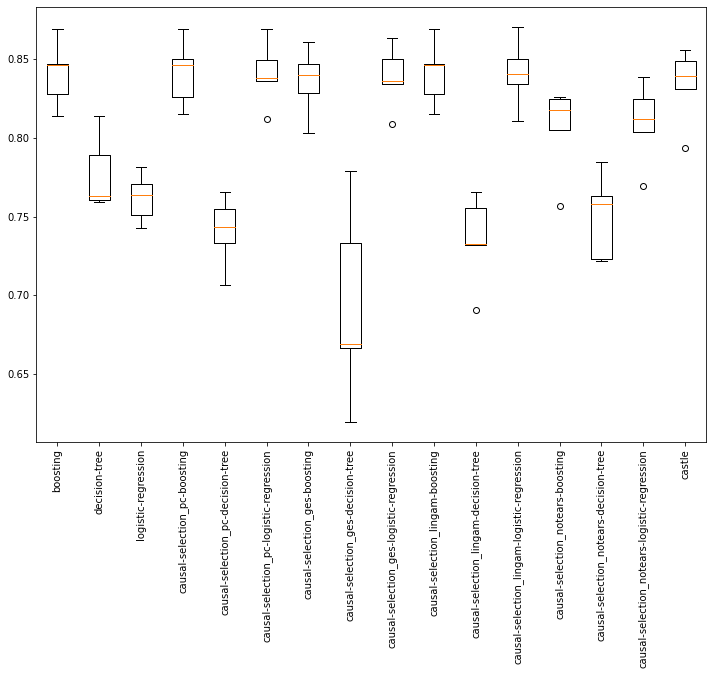

In [118]:
plt.figure(figsize=(12, 8));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

### Boosting

In [119]:
predictive_model = "boosting"
test_scores = {}
train_scores = {}
names = [
    predictive_model,
    f"causal-selection_pc-{predictive_model}", 
    f"causal-selection_ges-{predictive_model}", 
    f"causal-selection_lingam-{predictive_model}", 
    f"causal-selection_notears-{predictive_model}", 
    "castle"

]
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/causal-selection_pc-boosting.json.
finished loading results from ../out/grid-search/causal-selection_ges-boosting.json.
finished loading results from ../out/grid-search/causal-selection_lingam-boosting.json.
finished loading results from ../out/grid-search/causal-selection_notears-boosting.json.
finished loading results from ../out/grid-search/castle.json.


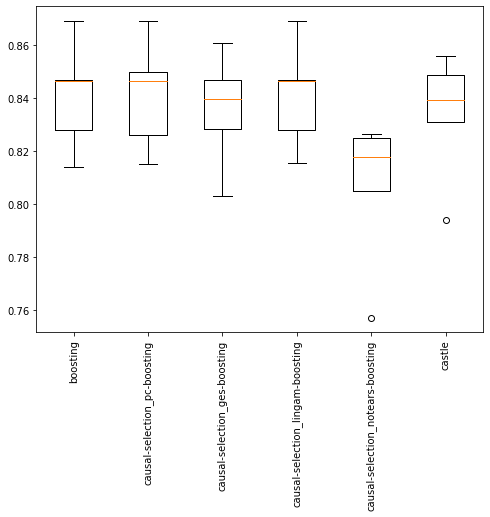

In [120]:
plt.figure(figsize=(8, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

### Logistic Regression

In [121]:
predictive_model = "logistic-regression"
test_scores = {}
train_scores = {}
names = [
    predictive_model,
    f"causal-selection_pc-{predictive_model}", 
    f"causal-selection_ges-{predictive_model}", 
    f"causal-selection_lingam-{predictive_model}", 
    f"causal-selection_notears-{predictive_model}", 
    "castle"

]
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_pc-logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_ges-logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_lingam-logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_notears-logistic-regression.json.
finished loading results from ../out/grid-search/castle.json.


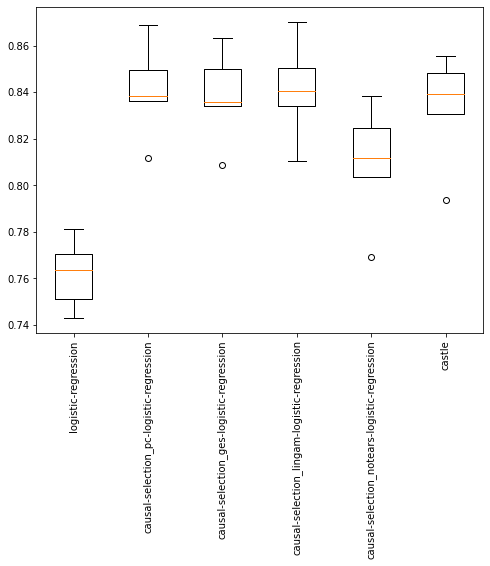

In [122]:
plt.figure(figsize=(8, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

### Decision Tree

In [123]:
predictive_model = "decision-tree"
test_scores = {}
train_scores = {}
names = [
    predictive_model,
    f"causal-selection_pc-{predictive_model}", 
    f"causal-selection_ges-{predictive_model}", 
    f"causal-selection_lingam-{predictive_model}", 
    f"causal-selection_notears-{predictive_model}", 
    "castle"

]
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_pc-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_ges-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_lingam-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_notears-decision-tree.json.
finished loading results from ../out/grid-search/castle.json.


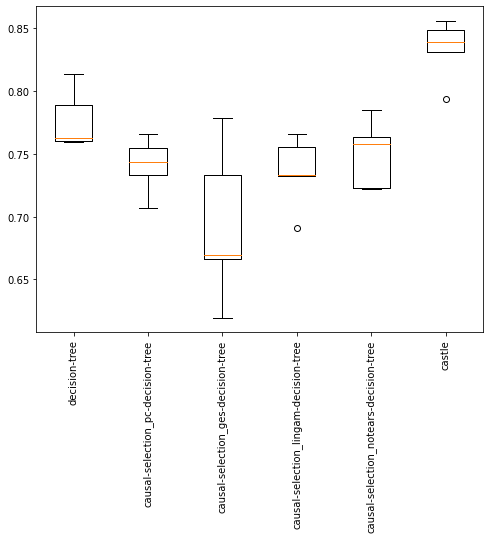

In [124]:
plt.figure(figsize=(8, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

### PC

In [125]:
causal_model = "pc"
predictive_models = ["boosting", "logistic-regression", "decision-tree"]
test_scores = {}
train_scores = {}
names = [f"causal-selection_{causal_model}-{predictive_model}" for predictive_model in predictive_models]

for name in sum(list(zip(predictive_models, names)), ()):
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/causal-selection_pc-boosting.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_pc-logistic-regression.json.
finished loading results from ../out/grid-search/decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_pc-decision-tree.json.


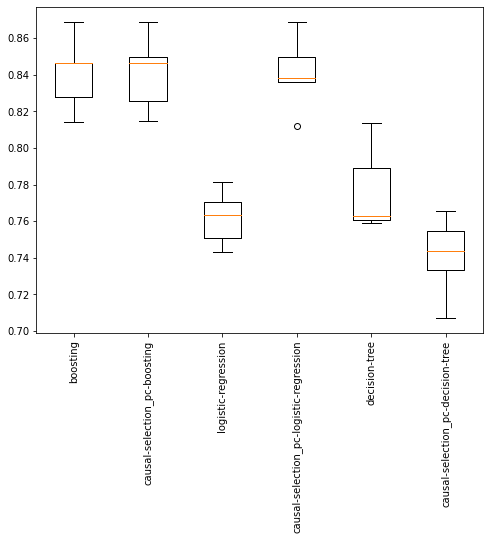

In [126]:
plt.figure(figsize=(8, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

### GES

In [127]:
causal_model = "ges"
predictive_models = ["boosting", "logistic-regression", "decision-tree"]
test_scores = {}
train_scores = {}
names = [f"causal-selection_{causal_model}-{predictive_model}" for predictive_model in predictive_models]

for name in sum(list(zip(predictive_models, names)), ()):
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/causal-selection_ges-boosting.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_ges-logistic-regression.json.
finished loading results from ../out/grid-search/decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_ges-decision-tree.json.


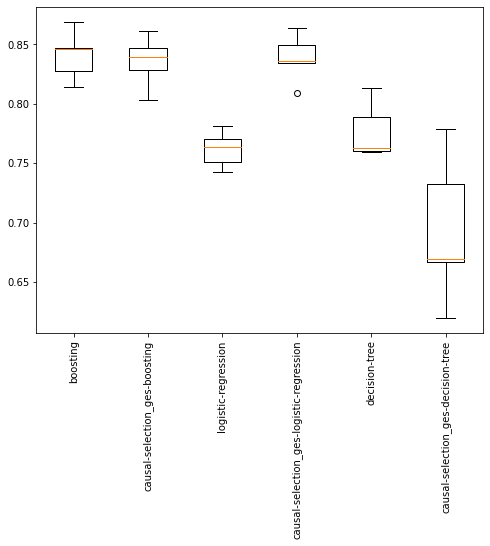

In [128]:
plt.figure(figsize=(8, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

### LiNGAM

In [129]:
causal_model = "lingam"
predictive_models = ["boosting", "logistic-regression", "decision-tree"]
test_scores = {}
train_scores = {}
names = [f"causal-selection_{causal_model}-{predictive_model}" for predictive_model in predictive_models]

for name in sum(list(zip(predictive_models, names)), ()):
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/causal-selection_lingam-boosting.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_lingam-logistic-regression.json.
finished loading results from ../out/grid-search/decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_lingam-decision-tree.json.


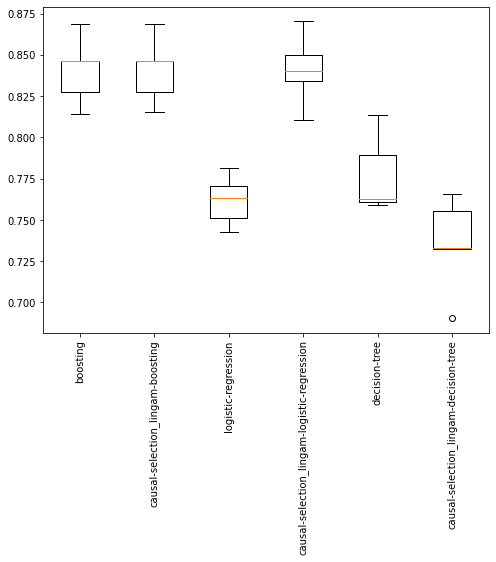

In [130]:
plt.figure(figsize=(8, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

### NOTEARS

In [131]:
causal_model = "notears"
predictive_models = ["boosting", "logistic-regression", "decision-tree"]
test_scores = {}
train_scores = {}
names = [f"causal-selection_{causal_model}-{predictive_model}" for predictive_model in predictive_models]

for name in sum(list(zip(predictive_models, names)), ()):
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/boosting.json.
finished loading results from ../out/grid-search/causal-selection_notears-boosting.json.
finished loading results from ../out/grid-search/logistic-regression.json.
finished loading results from ../out/grid-search/causal-selection_notears-logistic-regression.json.
finished loading results from ../out/grid-search/decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_notears-decision-tree.json.


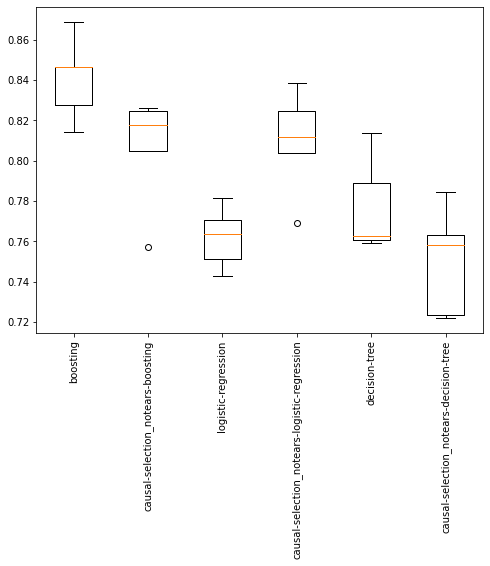

In [132]:
plt.figure(figsize=(8, 6));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()

In [133]:
test_scores = {}
train_scores = {}
names = [
    "causal-selection_pc-boosting", 
    "causal-selection_pc-decision-tree",
    "causal-selection_pc-logistic-regression",
]
for name in names:
    gs = utils.GridSearch(None, results[f"{name}.json"])
    test_scores[name] = gs.test_scores["best"]
    train_scores[name] = gs.train_scores["best"].mean()

finished loading results from ../out/grid-search/causal-selection_pc-boosting.json.
finished loading results from ../out/grid-search/causal-selection_pc-decision-tree.json.
finished loading results from ../out/grid-search/causal-selection_pc-logistic-regression.json.


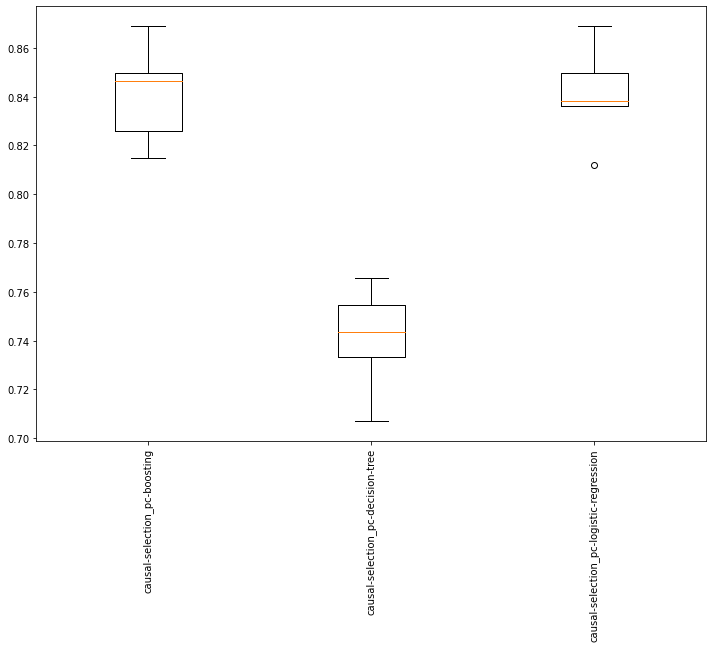

In [134]:
plt.figure(figsize=(12, 8));
plt.boxplot(test_scores.values(), labels = test_scores.keys());
plt.xticks(rotation=90);
plt.show()